### Problem Statement:
Titanic is a widely known disaster. However, it can be useful to learn from disasters. In this project, we acquired the dataset of the passengers of Titanic. It contains 10 features about approximately 1300 passengers; their name, ticket class, sex, age, ticket number, number of children and parents, number of siblings, ticket fare, cabin number, port of embarkation, and whether or not they survived.<br>
We wanted to predict whether or not a specific passenger has survived the tragedy. Therefore, We trained some classification models to predict that.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Cleaning and EDA

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

#### print the head of train and test data

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### print the shape of train and test data

In [53]:
train.shape

(891, 12)

In [54]:
test.shape

(418, 11)

#### Display the columns with null values and number of nulls

In [55]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### print summary statistics

In [57]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Correlation heatmap to see how features are correlated with SalePrice

In [59]:
corr=train.corr()

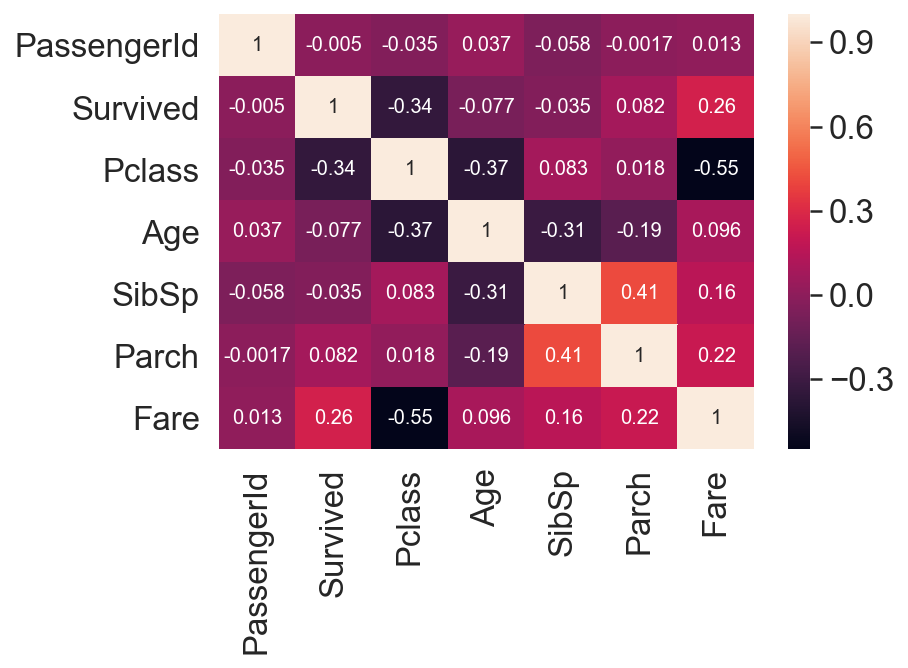

In [60]:
sns.heatmap(corr, annot=True)

### Filling null values

#### For port of embarkation: Replacing missing values with S because it is the most repetitve value

In [61]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
train['Embarked']=train['Embarked'].fillna('S')

#### For cabin: Grouping cabins by Pclass, then selecting one cabin for each class randomly to fill the missing values 

In [5]:
train['Cabin']= train['Cabin'].fillna('Unknown')

In [6]:
train['Cabin']= train['Cabin'].apply(lambda x: x[0])

In [7]:
train['Cabin'].head()

0    U
1    C
2    U
3    C
4    U
Name: Cabin, dtype: object

In [8]:
train.groupby('Pclass')['Cabin'].value_counts()

Pclass  Cabin
1       C         59
        B         47
        U         40
        D         29
        E         25
        A         15
        T          1
2       U        168
        F          8
        D          4
        E          4
3       U        479
        F          5
        G          4
        E          3
Name: Cabin, dtype: int64

In [9]:
train['Cabin'] = np.where((train.Pclass==1) & (train.Cabin=='U'),'T',
                                            np.where((train.Pclass==2) & (train.Cabin=='U'),'D',
                                                                        np.where((train.Pclass==3) & (train.Cabin=='U'),'E',train.Cabin
                                                                                                    )))

#### For sex: Replacing male and female with 0 and 1

In [10]:
train['Sex']=train['Sex'].apply(lambda x: 1 if x=='female' else 0 )

#### For age, we created an array of 6 values of age. They are the median of age for each gender of each Pclass

In [11]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [12]:

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = train[(train['Sex'] == i) & (train['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
for i in range(0, 2):
    for j in range(0, 3):
        train.loc[ (train.Age.isnull()) & (train.Sex == i) & (train.Pclass == j+1),'Age'] = guess_ages[i,j]

train['Age'] = train['Age'].astype(int)



#### Rechecking remaining missing values if any

In [75]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Filling the test data in the same way that we did with the train data 

In [13]:
test['Cabin']= test['Cabin'].fillna('Unknown')
test['Cabin']= test['Cabin'].apply(lambda x: x[0])    

In [14]:
test.groupby('Pclass')['Cabin'].value_counts()

Pclass  Cabin
1       C         35
        U         27
        B         18
        D         11
        E          9
        A          7
2       U         86
        F          5
        D          2
3       U        214
        F          3
        G          1
Name: Cabin, dtype: int64

In [15]:
test['Cabin'] = np.where((test.Pclass==1) & (test.Cabin=='U'),'T',
                                            np.where((test.Pclass==2) & (test.Cabin=='U'),'D',
                                                                        np.where((test.Pclass==3) & (test.Cabin=='U'),'E',test.Cabin
                                                                                                    )))

In [16]:
test.groupby('Pclass')['Cabin'].value_counts()

Pclass  Cabin
1       C         35
        T         27
        B         18
        D         11
        E          9
        A          7
2       D         88
        F          5
3       E        214
        F          3
        G          1
Name: Cabin, dtype: int64

In [17]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [18]:
test['Sex']=test['Sex'].apply(lambda x: 1 if x=='female' else 0 )

In [19]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = test[(test['Sex'] == i) & (test['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
for i in range(0, 2):
    for j in range(0, 3):
        test.loc[ (test.Age.isnull()) & (test.Sex == i) & (test.Pclass == j+1),'Age'] = guess_ages[i,j]

test['Age'] = test['Age'].astype(int)

In [20]:
test['Fare']=test['Fare'].fillna('unknown')

In [21]:
test.loc[test['Fare'] == 'unknown']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60,0,0,3701,unknown,E,S


In [22]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [23]:
test['Fare'].replace('unknown', 14, inplace=True)

In [24]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Data Visualization

#### Distributions of the features in the dataset

In [91]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,24)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color='skyblue') # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
       

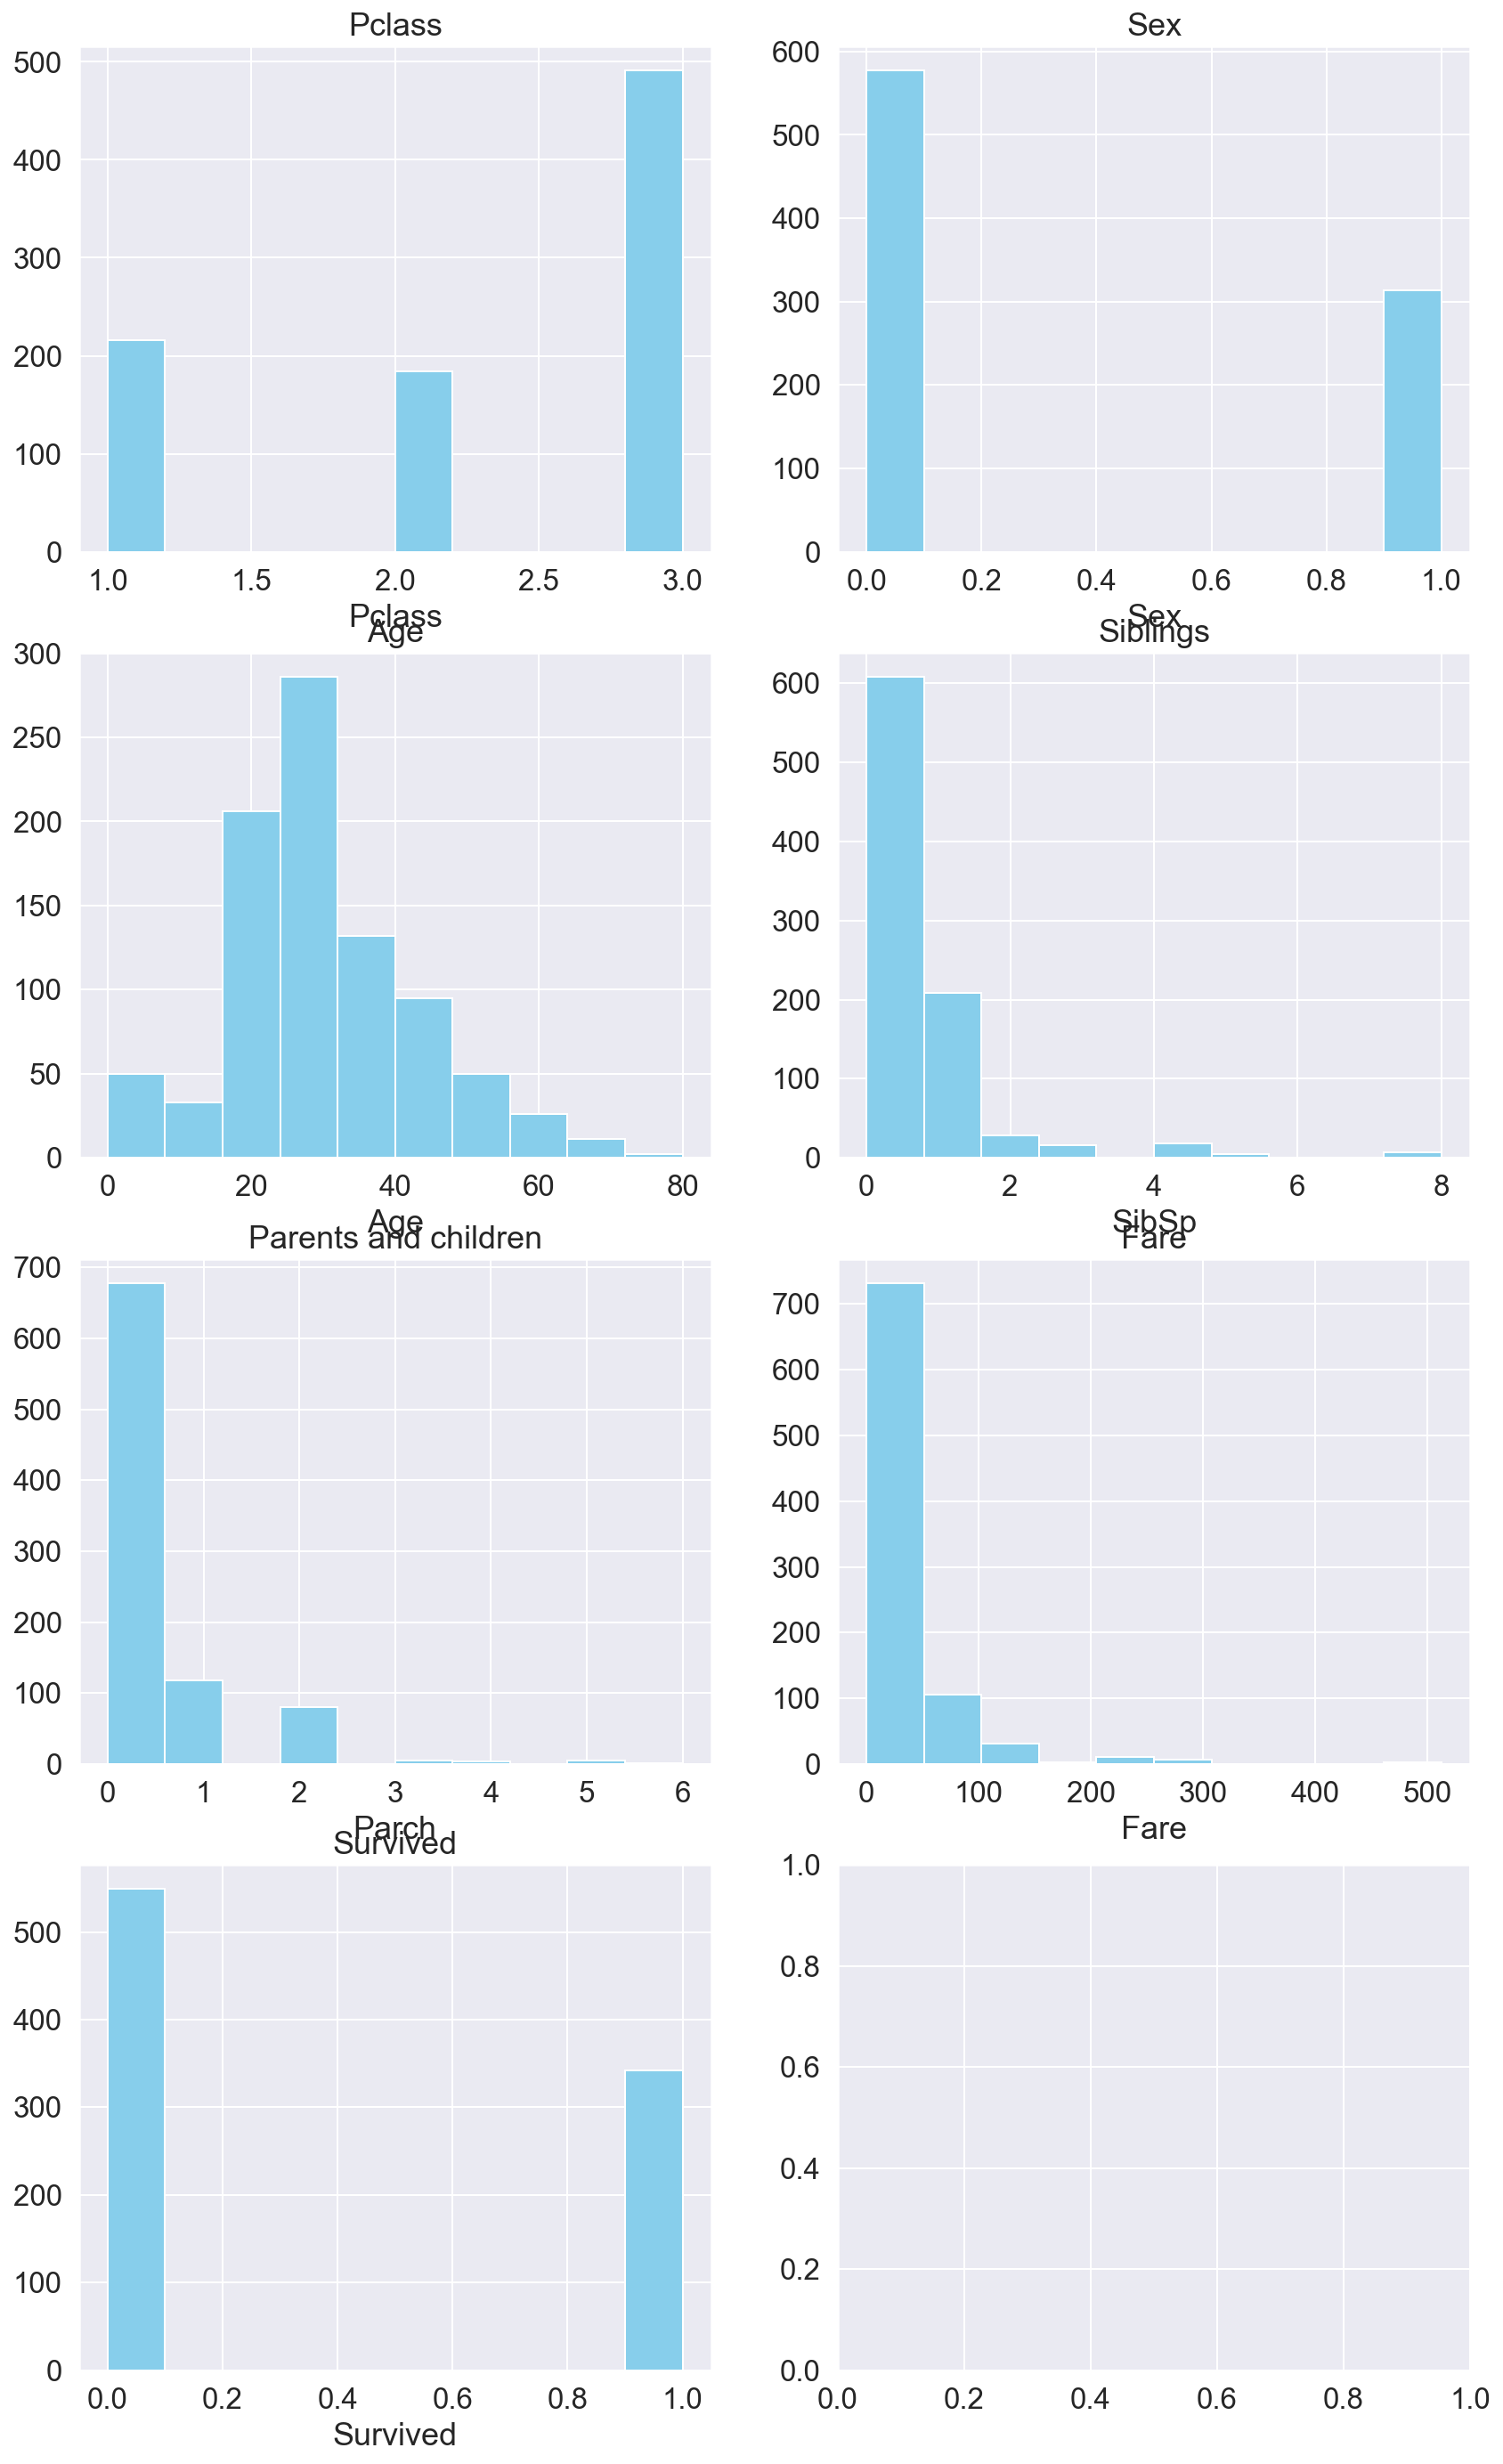

In [92]:
cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']
tit=['Pclass','Sex','Age','Siblings','Parents and children','Fare','Survived']
xs=['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']
subplot_histograms(train,cols,tit,xs)

#### Distributions of the features in the dataset for the survivors only

In [93]:
surv=pd.DataFrame(train.loc[train['Survived'] == 1])

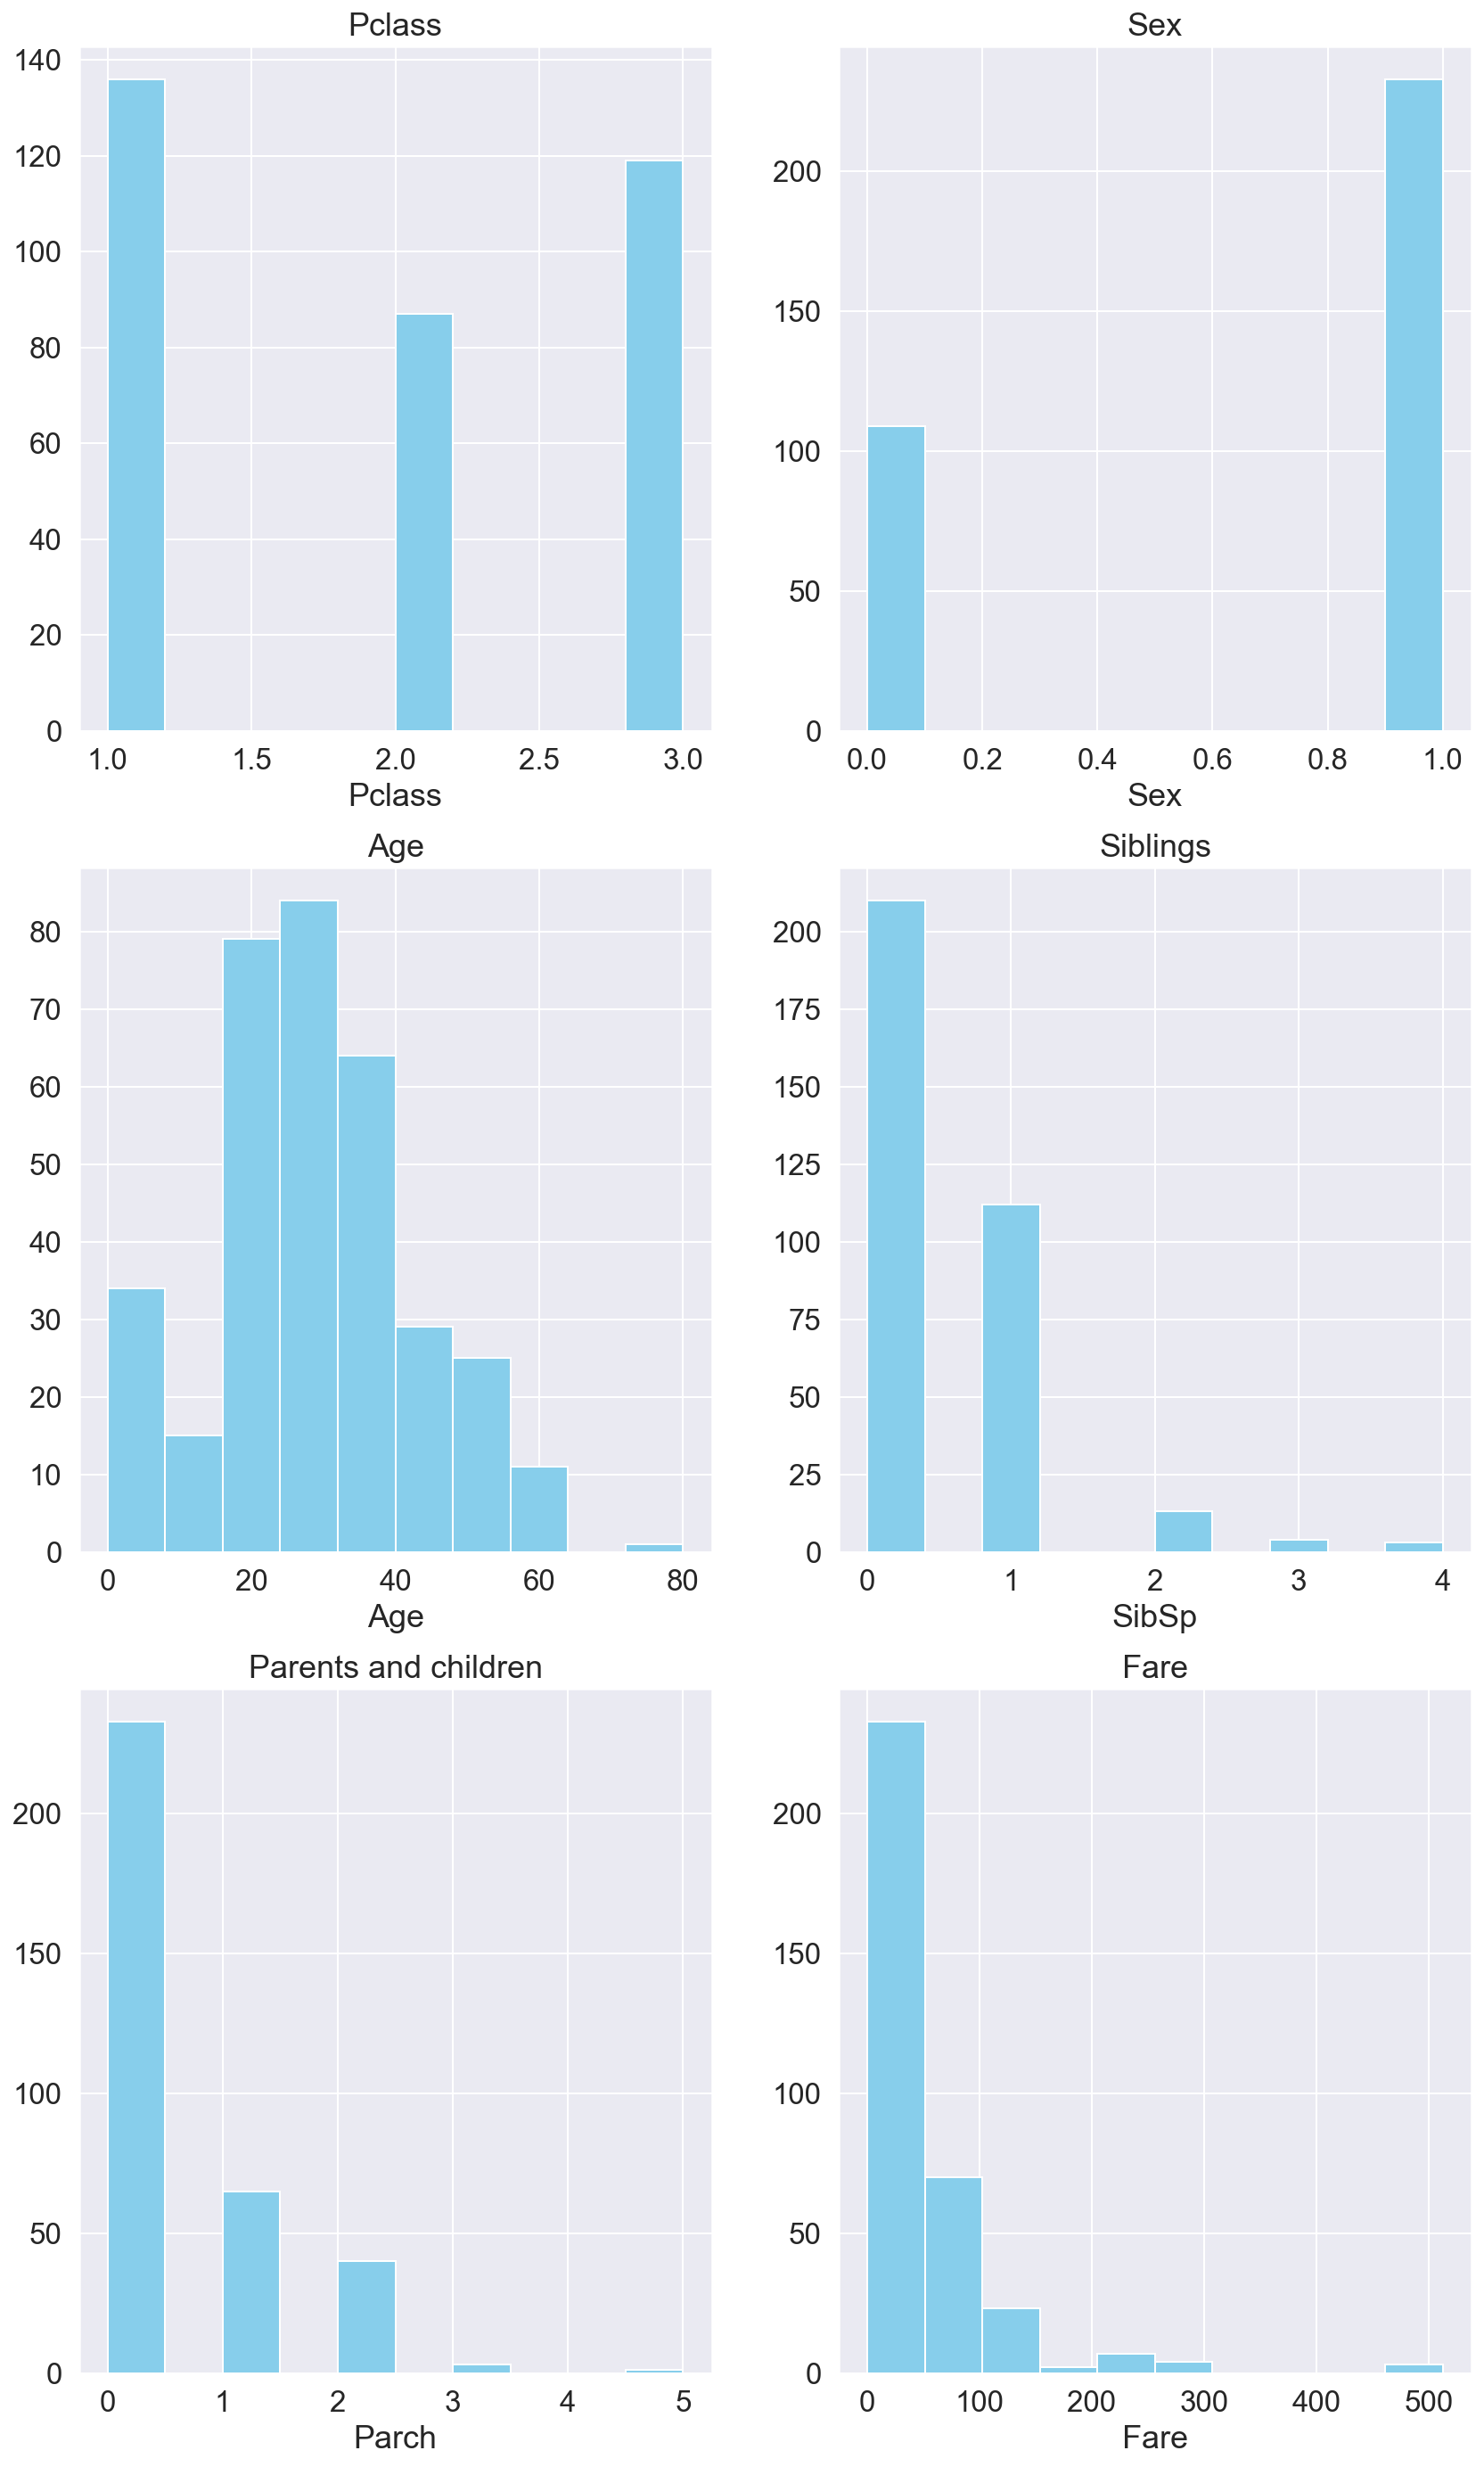

In [94]:


cols=['Pclass','Sex','Age','SibSp','Parch','Fare']
tit=['Pclass','Sex','Age','Siblings','Parents and children','Fare']
xs=['Pclass','Sex','Age','SibSp','Parch','Fare']
subplot_histograms(surv,cols,tit,xs)

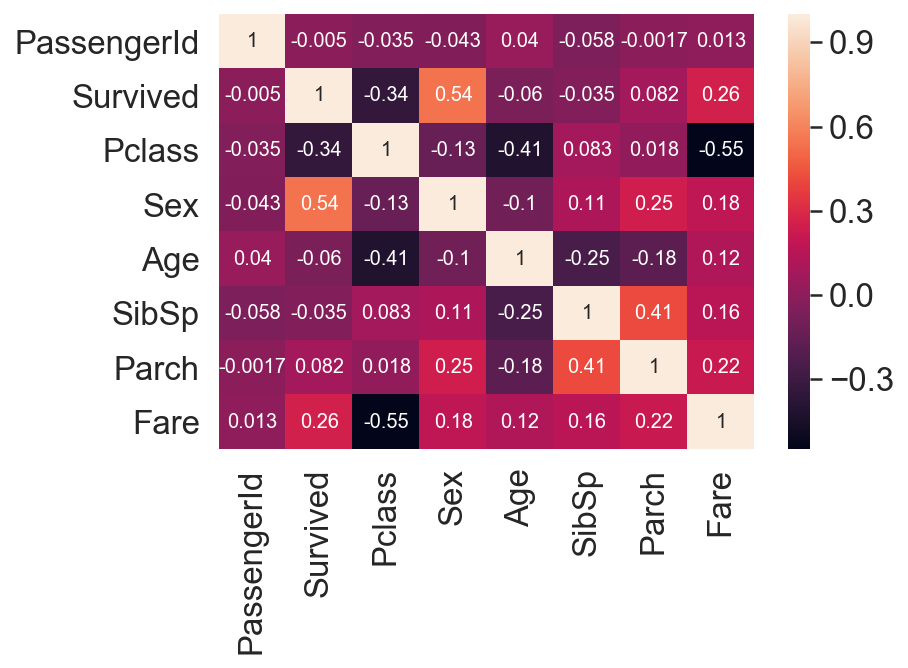

In [95]:
sns.heatmap(train.corr(),annot=True)

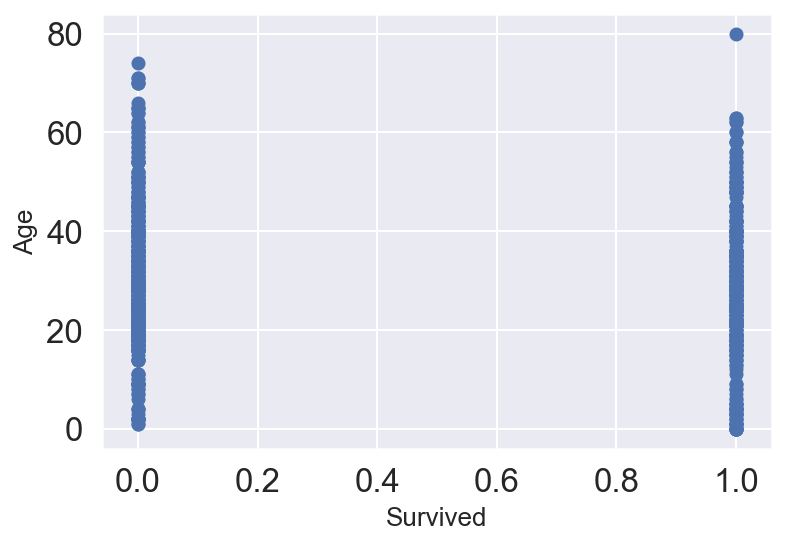

In [96]:
fig, ax = plt.subplots()
ax.scatter(x = train['Survived'], y = train['Age'])
plt.ylabel('Age', fontsize=13)
plt.xlabel('Survived', fontsize=13)
plt.title('')
plt.show()

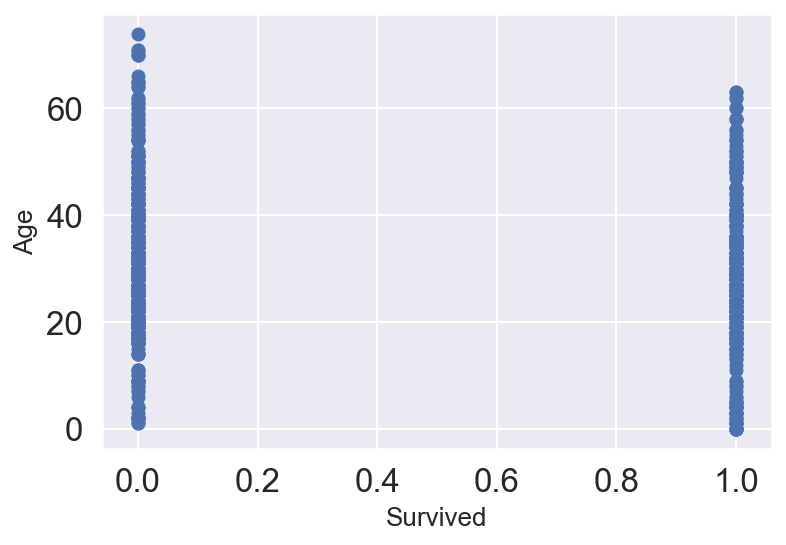

In [97]:
#Deleting outliers
train = train.drop(train[(train['Survived']== 1) & (train['Age']>79)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = train['Survived'], y = train['Age'])
plt.ylabel('Age', fontsize=13)
plt.xlabel('Survived', fontsize=13)
plt.title('')
plt.show()

#### Display pie plot for percentage of Male Vs. Female passengers

0    0.647191
1    0.352809
Name: Sex, dtype: float64


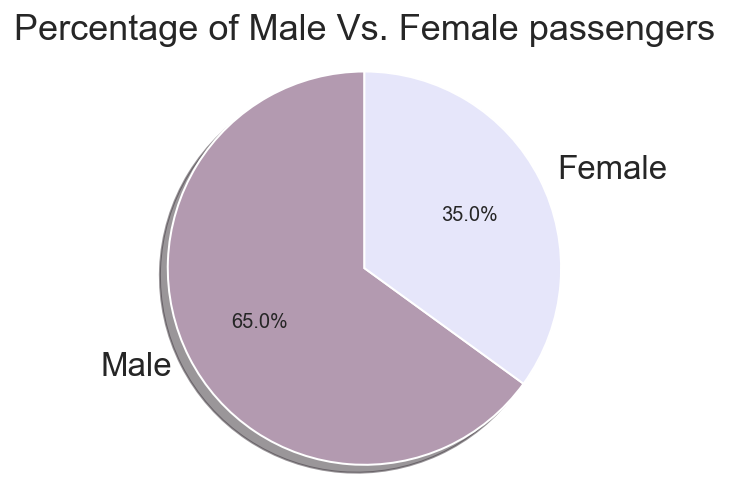

In [99]:
def percentage(part):
    whole= train['Sex'].value_counts().sum()
    percentage= (part/whole)
    return percentage

percentage= train['Sex'].value_counts().apply(lambda x : percentage(x))
print (percentage)



labels = 'Male','Female' 
sizes = [65, 35]
c=['#b39ab0','#e6e6fa']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors=c,
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Percentage of Male Vs. Female passengers')
plt.show()


#### Display pie plot for percentage of Male Vs. Female  survivors

1    0.681287
0    0.318713
Name: Sex, dtype: float64


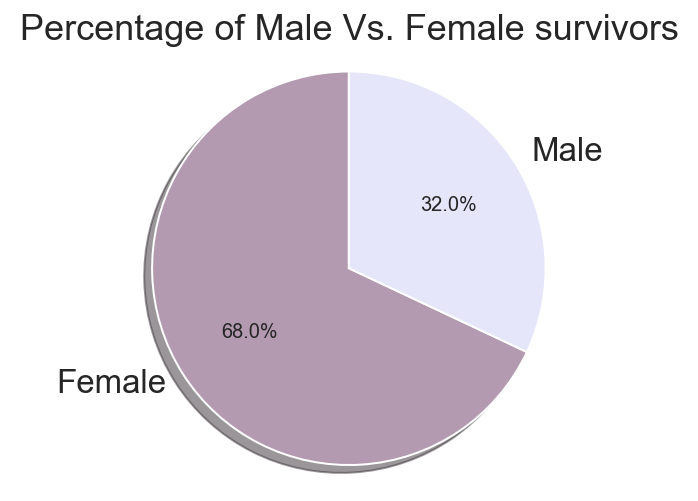

In [111]:
def percentage(part):
    whole= surv['Sex'].value_counts().sum()
    percentage= (part/whole)
    return percentage

percentage= surv['Sex'].value_counts().apply(lambda x : percentage(x))
print (percentage)



labels = 'Female', 'Male'
sizes = [68, 32]
c=['#b39ab0','#e6e6fa']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors=c,
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Percentage of Male Vs. Female survivors')
plt.show()


#### Display count plot for range of ages in each Pclass

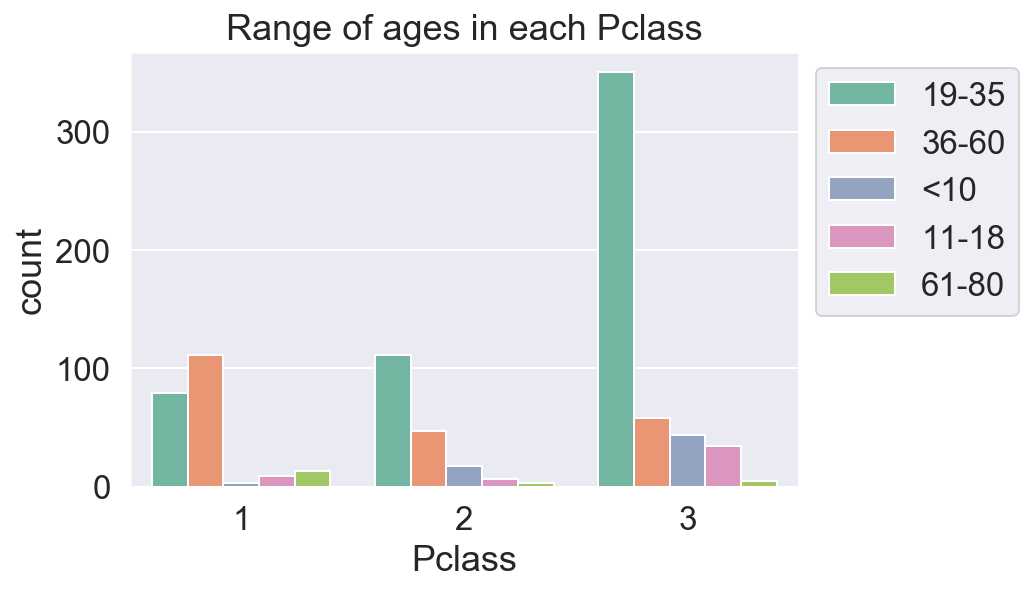

In [102]:
cat=train['Age']
cat=cat.apply(lambda x:'<10' if x<11 else '11-18' if x<18  else '19-35' if x<36  else '36-60' if x<61  else '61-80')

c= {'male': '#8c9fff' , 'female': '#ffb68c'}
sns.countplot(x='Pclass', data = train , hue=cat, palette= 'Set2' )
plt.title('Range of ages in each Pclass')
plt.legend(bbox_to_anchor=(1,1), loc=2)

#### Display count plot for range of ages of survivors in each Pclass

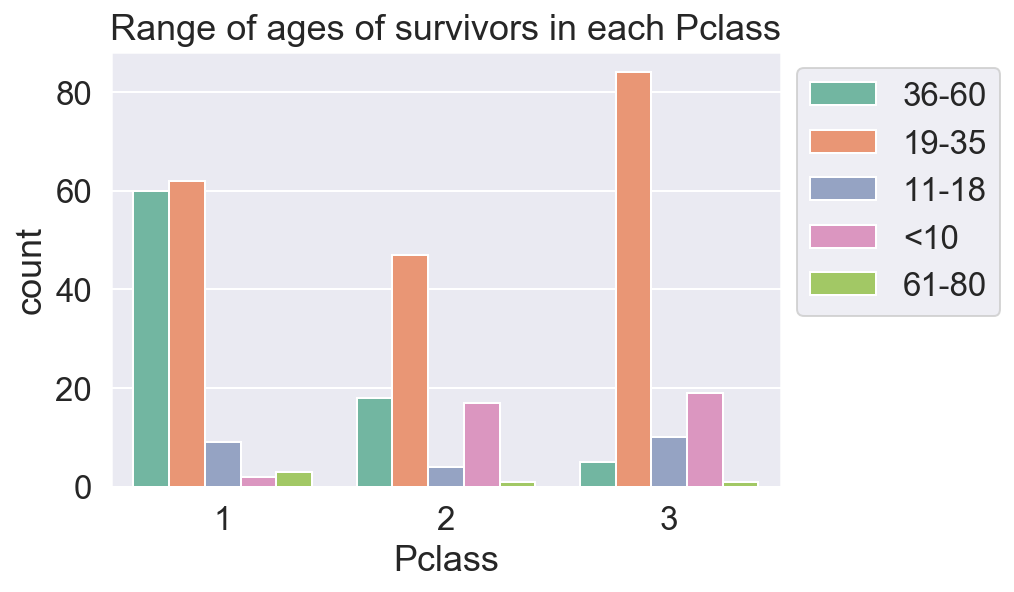

In [112]:
cat=surv['Age']
cat=cat.apply(lambda x:'<10' if x<11 else '11-18' if x<18  else '19-35' if x<36  else '36-60' if x<61  else '61-80')

c= {'male': '#8c9fff' , 'female': '#ffb68c'}
sns.countplot(x='Pclass', data = surv , hue=cat, palette= 'Set2' )
plt.title('Range of ages of survivors in each Pclass')
plt.legend(bbox_to_anchor=(1,1), loc=2)

#### Display count plot for range of ages of ages for survivors

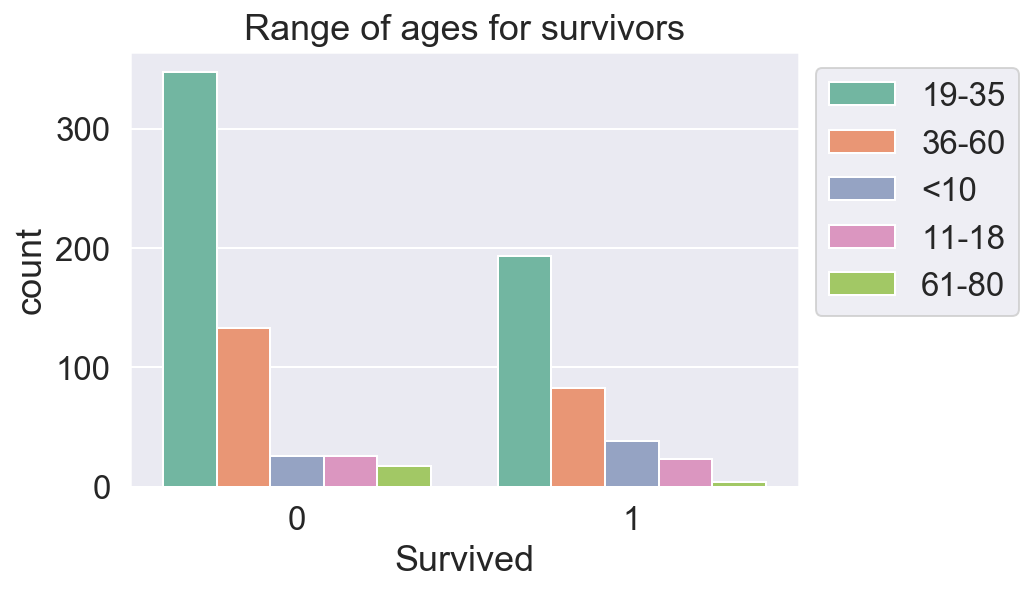

In [104]:
c= {'male': '#8c9fff' , 'female': '#ffb68c'}
sns.countplot(x='Survived', data = train , hue=cat, palette= 'Set2' )
plt.title('Range of ages for survivors')
plt.legend(bbox_to_anchor=(1,1), loc=2)

#### Display a plot for range of survivors for each Pclass

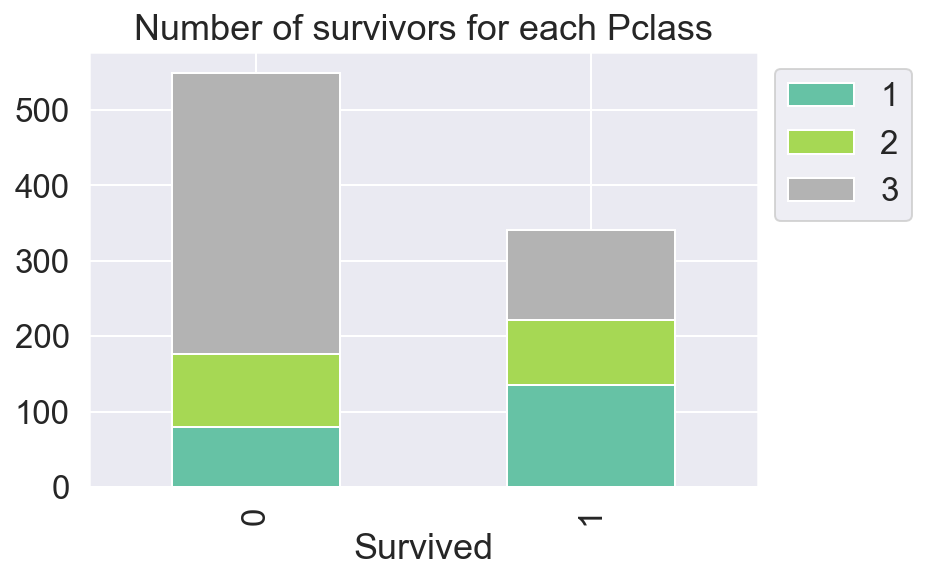

In [107]:
df_plot=train.groupby(['Pclass', 'Survived']).size().reset_index().pivot(columns='Pclass', index='Survived', values=0)
df_plot.plot(kind='bar', stacked=True,colormap='Set2')
plt.title('Number of survivors for each Pclass')
plt.legend(bbox_to_anchor=(1,1), loc=2)

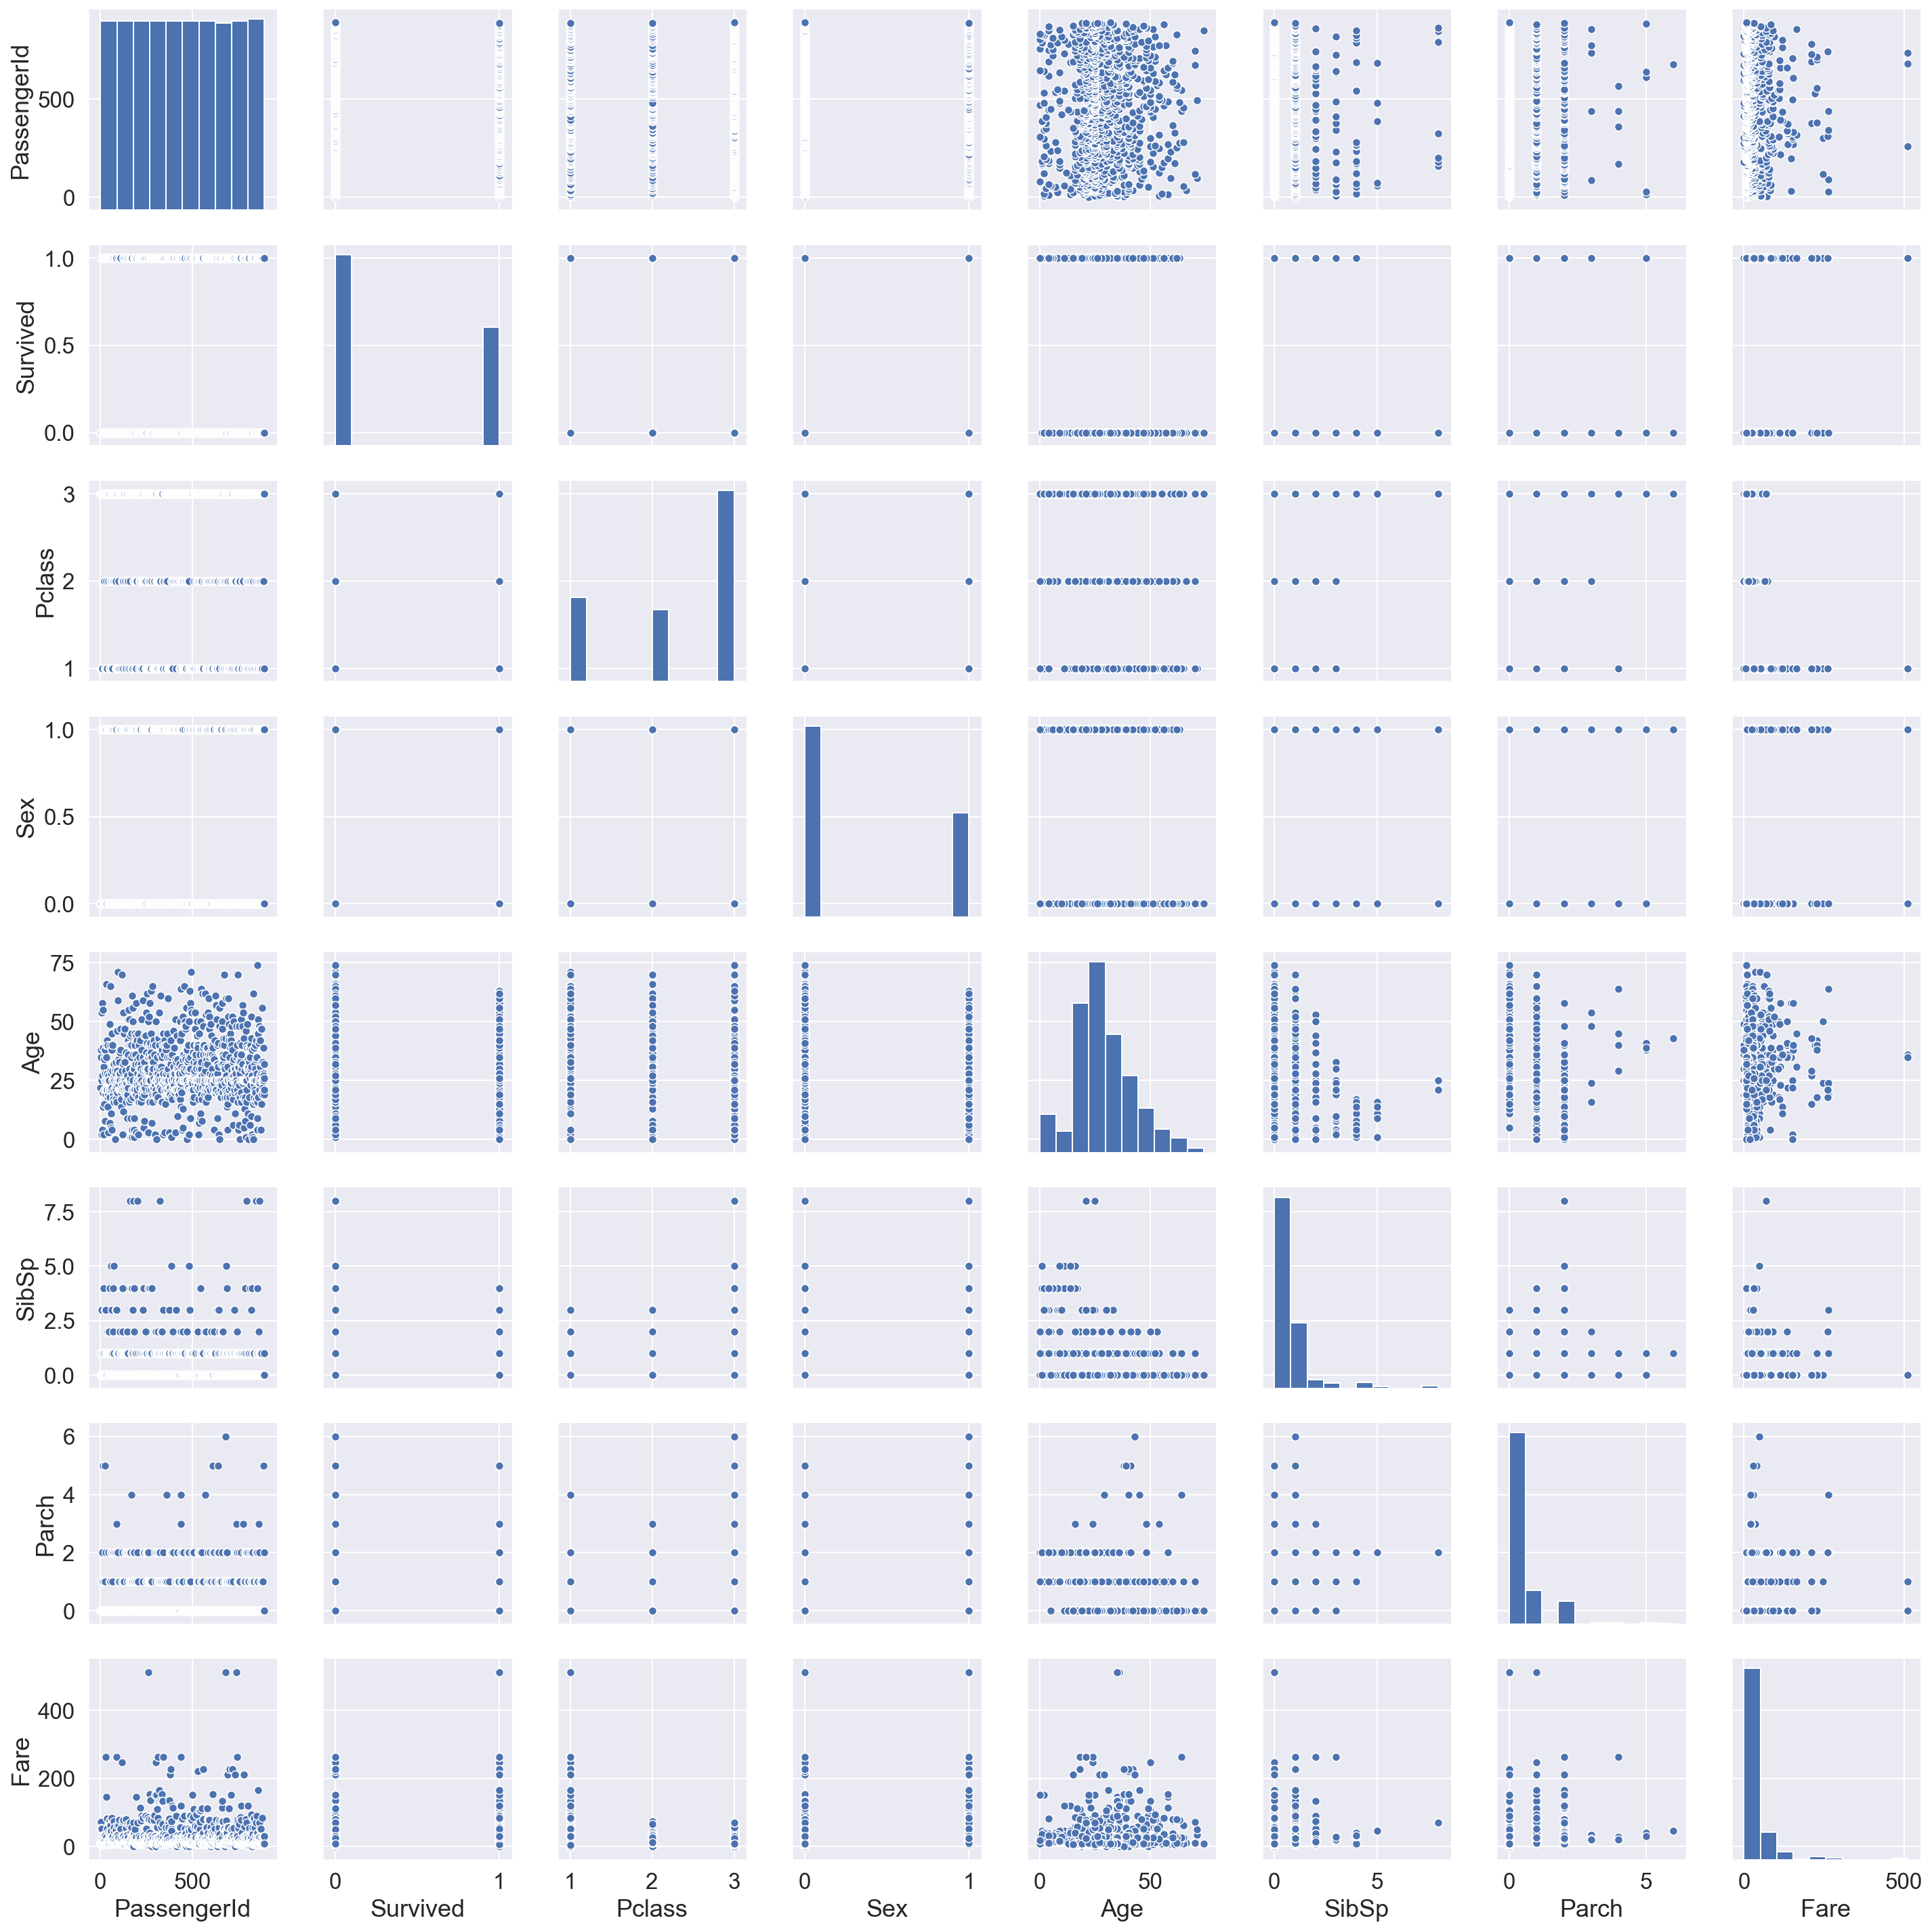

In [266]:

sns.pairplot(train)

## Preprocessing and Modeling

#### Split data to train and test

In [25]:
features_drop = ['PassengerId','Name', 'Ticket', 'Survived','Embarked','Cabin']
selected_features=[c for c in train if c not in features_drop]
selected_features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [26]:
X_train = train[selected_features]
y_train = train['Survived']
X_test= test[selected_features]

#### We imported StandardScaler and applied it to both X_train and X_test.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [269]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# x_train_scaled = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(x_train_scaled)

# x_test_scaled = scaler.fit_transform(X_test)
# X_test = pd.DataFrame(x_test_scaled)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#### Calculating the baseline

In [31]:
baseline=y_train.value_counts(normalize=True)
baseline[0]

0.6161616161616161

#### In this model, we created a K neighbors classifier and applied the model on the entire features in X_train.

In [272]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
m_score= knn.score(X_train, y_train)
print('Model score: ', m_score)

Model score:  0.8595505617977528


In [273]:
predictions = pd.DataFrame(knn.predict(X_test))
predictions['PassengerId']=[i for i in range(892, 1310)]
predictions.rename(columns={0:'Survived'},inplace=True)
predictions.set_index('PassengerId',inplace=True)

In [275]:
predictions.to_csv('predictions_knn.csv')

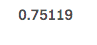

#### In this model, we created a K neighbors classifier after performing a grid search. We applied the model on the entire features in X_train.

In [276]:
from sklearn.model_selection import GridSearchCV
knn_params = {
    'n_neighbors': range(1,100),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']}
print('Initialized parameters for Grid Search')
print(knn_params)

Initialized parameters for Grid Search
{'n_neighbors': range(1, 100), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [277]:
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), 
                              knn_params, 
                              n_jobs=1, cv=5) # try verbose!


knn_gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 100),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [278]:
best_knn = knn_gridsearch.best_estimator_
best_knn.score(X_train, y_train)
predictions = pd.DataFrame(best_knn.predict(X_test))

In [280]:
predictions['PassengerId']=[i for i in range(892, 1310)]
predictions.rename(columns={0:'Survived'},inplace=True)
predictions.set_index('PassengerId',inplace=True)
predictions.to_csv('predictions_gs_knn_afteroutliers.csv')

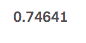

#### In this model, we created a decision tree after performing a grid search. We applied the model on the entire features in X_train.

In [281]:
from sklearn.tree import DecisionTreeClassifier

In [282]:
dtc_params = {
    'max_depth': range(1,20),
    'max_features': [None, 'log2', 'sqrt'],
    'min_samples_split': range(5,30),
    'max_leaf_nodes': [None],
    'min_samples_leaf': range(1,10)
}

from sklearn.model_selection import GridSearchCV
# set the gridsearch
dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params,  n_jobs=-1, cv=5)

In [283]:
dtc_gs.fit(X_train, y_train)

/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'max_features': [None, 'log2', 'sqrt'],
                     

In [284]:
predictions = dtc_gs.best_estimator_.predict(X_test)
# predictions.to_csv('predictions_dt_gs.csv')

In [285]:
predictions = pd.DataFrame(predictions)
predictions['PassengerId']=[i for i in range(892, 1310)]
predictions.rename(columns={0:'Survived'},inplace=True)
predictions.set_index('PassengerId',inplace=True)
predictions.to_csv('predictions_dt_gs.csv')

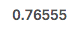

#### In this model, we created a Random Forest after performing a grid search. We applied the model on the entire features in X_train.

In [286]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf_params = {
      'n_estimators': range(1,100),
#     'max_features':[2, 3, 5, 7, 8],
      'max_depth': range(1,20),
     'criterion':['gini', 'entropy'],
}

In [287]:
rf_g = RandomForestClassifier() 

In [288]:
gs = GridSearchCV(rf_g, param_grid=rf_params, cv=5, verbose = 1)#, refit=False) 

In [289]:
gs=gs.fit(X_train, y_train)

Fitting 5 folds for each of 3762 candidates, totalling 18810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 18810 out of 18810 | elapsed: 26.6min finished
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [290]:
predictions = gs.best_estimator_.predict(X_test)


In [291]:
predictions = pd.DataFrame(predictions)
predictions['PassengerId']=[i for i in range(892, 1310)]
predictions.rename(columns={0:'Survived'},inplace=True)
predictions.set_index('PassengerId',inplace=True)
predictions.to_csv('predictions_RF_gs.csv')

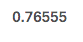

#### In this model, we created a Extra trees classifier after performing a grid search. We applied the model on the entire features in X_train.

In [145]:
rf_params = {
      'n_estimators': range(1,100),
#     'max_features':[2, 3, 5, 7, 8],
      'max_depth': range(1,20),
     'criterion':['gini', 'entropy'],
}

In [146]:
et_g = ExtraTreesClassifier()

In [147]:
gs_et = GridSearchCV(rf_g, param_grid=rf_params, cv=5, verbose = 1)#, refit=False) 

In [148]:
gs_et =gs_et.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   55.9s finished


In [149]:
predictions = gs_et.best_estimator_.predict(X_test)

In [150]:
predictions = pd.DataFrame(predictions)
predictions['PassengerId']=[i for i in range(892, 1310)]
predictions.rename(columns={0:'Survived'},inplace=True)
predictions.set_index('PassengerId',inplace=True)
predictions.to_csv('predictions_ET_gs.csv')

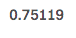

#### In this model, we created a Logistic regression with lasso after performing a grid search. We applied the model on the entire features in X_train.

In [292]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
model = LogisticRegression()
params = {'C':np.logspace(-5,5,15),
          'penalty':['l1'],
          'fit_intercept':[True,False]}
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.score(X_train,y_train))


/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

0.801123595505618
0.8101123595505618


/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

In [293]:
predictions= gs.predict(X_test)
predictions = pd.DataFrame(predictions)
predictions['PassengerId']=[i for i in range(892, 1310)]
predictions.rename(columns={0:'Survived'},inplace=True)
predictions.set_index('PassengerId',inplace=True)
predictions.to_csv('predictions_log_l1.csv')

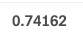

#### In this model, we created a Logistic regression with ridge after performing a grid search. We applied the model on the entire features in X_train.

In [295]:
model = LogisticRegression()
params = {'C':np.logspace(-5,5,15),
          'penalty':['l2'], #Ridge
          'fit_intercept':[True,False]}
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)
gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.score(X_train,y_train))

/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

0.801123595505618
0.8101123595505618


/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

In [296]:
predictions= gs.predict(X_test)
predictions = pd.DataFrame(predictions)
predictions['PassengerId']=[i for i in range(892, 1310)]
predictions.rename(columns={0:'Survived'},inplace=True)
predictions.set_index('PassengerId',inplace=True)
predictions.to_csv('predictions_log_l2.csv')

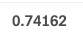

In [297]:
X_train_s = train[['Sex','Pclass']]
y_train_s = train['Survived']
X_test_s= test[['Sex','Pclass']]

In [298]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train_s), columns=X_train_s.columns)
X_test_s = pd.DataFrame(scaler.fit_transform(X_test_s), columns=X_test_s.columns)

In [299]:
rf_params = {
      'n_estimators': range(1,100),
#     'max_features':[2, 3, 5, 7, 8],
      'max_depth': range(1,20),
     'criterion':['gini', 'entropy'],
}
rf_g = RandomForestClassifier()
gs = GridSearchCV(rf_g, param_grid=rf_params, cv=5, verbose = 1)#, refit=False) 
gs=gs.fit(X_train_s, y_train_s)
predictions = gs.best_estimator_.predict(X_test_s)

Fitting 5 folds for each of 3762 candidates, totalling 18810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 18810 out of 18810 | elapsed: 19.1min finished
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [300]:
predictions = pd.DataFrame(predictions)
predictions['PassengerId']=[i for i in range(892, 1310)]
predictions.rename(columns={0:'Survived'},inplace=True)
predictions.set_index('PassengerId',inplace=True)
predictions.to_csv('predictions_RF_gs_s.csv')

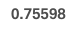

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train_s = train[['Sex','Pclass','Age']]
y_train_s = train['Survived']
X_test_s= test[['Sex','Pclass','Age']]

scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train_s), columns=X_train_s.columns)
X_test_s = pd.DataFrame(scaler.fit_transform(X_test_s), columns=X_test_s.columns)

rf_params = {
      'n_estimators': range(1,50),
#     'max_features':[2, 3, 5, 7, 8],
      'max_depth': range(1,20),
     'criterion':['gini', 'entropy'],
}
rf_g = RandomForestClassifier()
gs = GridSearchCV(rf_g, param_grid=rf_params, cv=5, verbose = 1)#, refit=False) 
gs=gs.fit(X_train_s, y_train_s)
predictions = gs.best_estimator_.predict(X_test_s)

predictions = pd.DataFrame(predictions)
predictions['PassengerId']=[i for i in range(892, 1310)]
predictions.rename(columns={0:'Survived'},inplace=True)
predictions.set_index('PassengerId',inplace=True)
predictions.to_csv('predictions_RF_gs_s2.csv')

Fitting 5 folds for each of 1862 candidates, totalling 9310 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9310 out of 9310 | elapsed:  6.1min finished
/Users/Hanoof/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


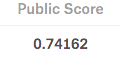

### Conclusion
In this project, we created classification models; LogisticRegression, ExtraTreesClassifier, KNeighborsClassifier, RandomForestClassifier and DecisionTreeClassifier to predict whether or not a Titanic passenger has survived. We tested all models by submitting them individually in Kaggle. The best score was for RandomForestClassifier and DecisionTreeClassifier, in which we got a score of 0.76555.